In [88]:
import numpy as np
import matplotlib.pyplot as plt
import math
#The function that solves the integral part of the equation
def Trapezoid(T):
    """
    Trapezoid sum rule
    
    """
    k = 1.380649*(10**(-23))
    #define the function
    x = 428/T
    f = lambda x: ((x**4)*(math.e**x))/(((math.e**x)-1)**2) 
    #define the X, Y points 
    deltax = (x - 0.00000001) / 1000
    resultsx = np.linspace(0.00000001, x, 1001)
    resultsy = f(resultsx)

    # To calculate the area
    area = np.empty([1000], float)
    for i in range(1000):
            area[i] = (resultsy[i]+resultsy[i+1]) * deltax/2
    
    return sum(area)

#The function that solves for heat capacity by calling the trapezoid function to solve the integral
def HeatCapacity(T):
    k = 1.380649*(10**(-23))
    HC = 9*0.001*(6.022*(10**28))*k*((T/428)**3) * Trapezoid(T)
    return (HC)

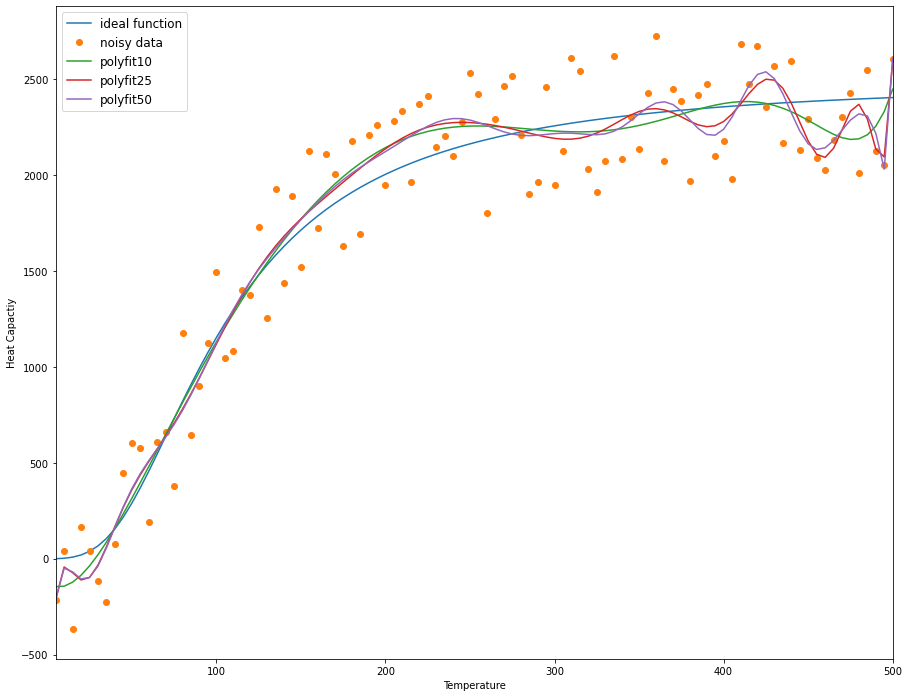

In [89]:
%matplotlib inline  

import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=[15, 12])
#define the function
f = lambda x: HeatCapacity(x)  

#define the paramters for the plot
a,b = 5,500
npoints = 100
order = 10

x = np.linspace(a,b,npoints)
y = np.empty(100)
z = np.empty(100)
randy = np.random.rand(npoints)
for i in range(100):
    y[i] = f(x[i]) + (800*randy[i]) - 400 
for i in range(100):
    z[i] = f(x[i])

fit = np.polyfit(x, y, order, full=True)
y_p = np.polyval(fit[0], x)

plt.plot(x,z, label='ideal function')
plt.plot(x,y, 'o', label='noisy data')
plt.plot(x,y_p, label='polyfit'+str(order))

fit = np.polyfit(x, y, order+15, full=True)
y_p = np.polyval(fit[0], x)
plt.plot(x,y_p, label='polyfit'+str(order+15))

fit = np.polyfit(x, y, order+40, full=True)
y_p = np.polyval(fit[0], x)
plt.plot(x,y_p, label='polyfit'+str(order+40))

plt.xlabel('Temperature')
plt.ylabel('Heat Capactiy')
plt.xlim([a,b])
plt.legend(fontsize=12)
plt.show()
#plt.text(2, 2, fit)


When heat capacity is calculated experimentally there is an experimental error that stems from the difference in what is obtained vs what was expected, in order to immitate this experimental error I used my heat capacity function and added a random component to it. (These random components have been exagerated in order to better illustrate the differences between different polynomial functions.) Above it can be seen that the ideal function fits the overall shape of the data best. While the higher polyfit functions follow the data's trends more explicitly, the lower polyfit functions are of more use as they contain less sharp changes and more generally follow the data.